Import pandas as pd

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/Gamma exposure of dealers BTC-2.csv')
print(df.head())

  currency                   ts           expiration  strike  gamma_level  \
0      BTC  2024-04-17 19:00:00  2025-03-28 08:00:00  300000          0.0   
1      BTC  2024-04-17 19:00:00  2025-03-28 08:00:00  250000          0.0   
2      BTC  2024-04-17 19:00:00  2025-03-28 08:00:00  220000          0.0   
3      BTC  2024-04-17 19:00:00  2025-03-28 08:00:00  200000          0.0   
4      BTC  2024-04-17 19:00:00  2025-03-28 08:00:00  180000          0.0   

   dealer_net_inventory  dealer_tot_inventory  
0                  29.9                  76.2  
1                   5.4                   9.6  
2                  13.5                  62.5  
3               -1059.5               -1462.3  
4                  22.4                  51.7  


Estructura de los datos:

La moneda es BTC (Bitcoin) para todos los registros.
La marca de tiempo (ts) es la misma para todos: 2024-04-17 19:00:00.
La fecha de vencimiento (expiration) es 2025-03-28 08:00:00 para estos registros.
Los precios de ejercicio (strike) varían.
El nivel gamma es 0 para todos los registros mostrados.


Observaciones clave:

Hay una gran variación en los inventarios de los dealers, tanto netos como totales.
El registro con strike 200000 tiene un inventario negativo muy grande (-1059.5 neto, -1462.3 total), lo que podría indicar una posición corta significativa.

In [14]:
print(df.info())
print("\nDescripción estadística:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   currency              100 non-null    object 
 1   ts                    100 non-null    object 
 2   expiration            100 non-null    object 
 3   strike                100 non-null    int64  
 4   gamma_level           100 non-null    float64
 5   dealer_net_inventory  100 non-null    float64
 6   dealer_tot_inventory  100 non-null    float64
 7   inventory_difference  100 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.4+ KB
None

Descripción estadística:
              strike  gamma_level  dealer_net_inventory  dealer_tot_inventory  \
count     100.000000   100.000000            100.000000             100.00000   
mean    92680.000000    -0.000500            -26.576200             -73.21710   
std     63086.101176     0.003589            213.87

Estructura del DataFrame:

Hay 100 entradas en total.
7 columnas: currency, ts, expiration, strike, gamma_level, dealer_net_inventory, y dealer_tot_inventory.
Los tipos de datos son adecuados: objetos para texto/fechas, int64 para strike, y float64 para los valores numéricos.


Análisis de las columnas numéricas:

a) strike (Precio de ejercicio):

Rango: 10,000 a 300,000
Media: 92,680
Mediana (50%): 72,500
Hay una gran dispersión en los precios de ejercicio.

b) gamma_level:

Rango: -0.03 a 0.01
Media: -0.0005
Mediana: 0
La mayoría de los valores parecen ser 0, pero hay algunos valores no nulos.

c) dealer_net_inventory:

Rango: -1,059.5 a 407.39
Media: -26.5762
Mediana: 3
Hay una gran variabilidad, con algunos valores muy negativos.

d) dealer_tot_inventory:

Rango: -3,024.9 a 1,935
Media: -73.2171
Mediana: 24.75
Aún mayor variabilidad que el inventario neto.

/home/antonio-tapia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


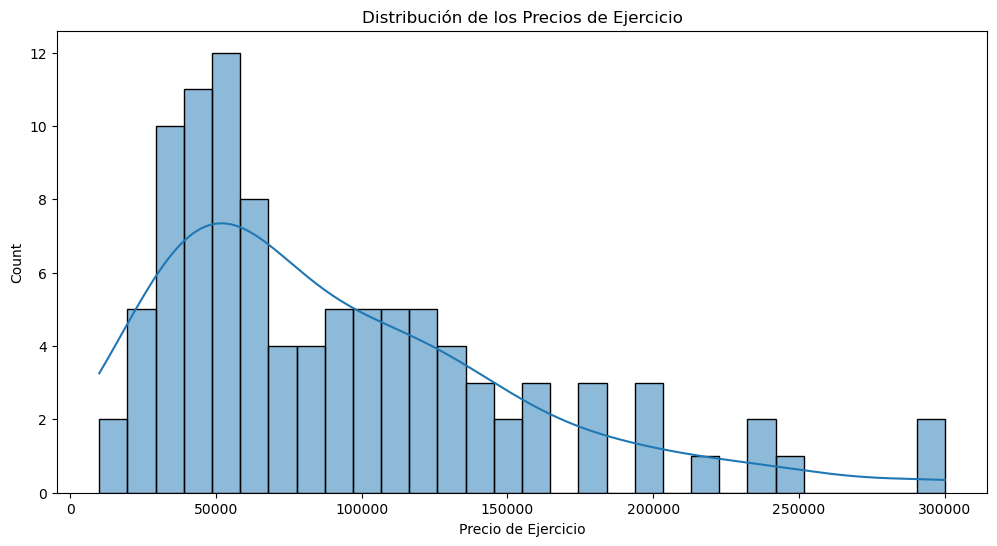

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['strike'], bins=30, kde=True)
plt.title('Distribución de los Precios de Ejercicio')
plt.xlabel('Precio de Ejercicio')
plt.show()

Rango: Los precios de ejercicio van desde cerca de 0 hasta 300,000 (probablemente en dólares estadounidenses).
Distribución: La distribución es asimétrica hacia la derecha (cola larga a la derecha), con la mayoría de los precios de ejercicio concentrados en los valores más bajos.
Moda: El pico más alto del histograma está alrededor de los 50,000-60,000, lo que sugiere que esta es la zona de precios de ejercicio más común.
Frecuencia: Hay una alta frecuencia de opciones con precios de ejercicio entre aproximadamente 25,000 y 75,000.
Cola larga: Hay una cola larga que se extiende hacia la derecha, con algunos precios de ejercicio llegando hasta 300,000, aunque con frecuencias mucho más bajas.
Línea de densidad: La línea azul suave sobre el histograma representa la estimación de densidad kernel (KDE), que muestra la forma general de la distribución.
Multimodalidad: Parece haber varios picos menores, lo que sugiere que podría haber cierta multimodalidad en la distribución.

Esta distribución nos dice que:

Los traders están más interesados en opciones con precios de ejercicio cercanos al precio actual de Bitcoin (asumiendo que el precio actual está en el rango de 50,000-60,000).
Hay un interés significativo en opciones out-of-the-money (OTM) con precios de ejercicio más altos, como se ve en la cola larga a la derecha.
Las opciones con precios de ejercicio muy altos (por ejemplo, 250,000-300,000) son menos comunes pero aún están presentes, posiblemente representando apuestas muy optimistas o estrategias de cobertura extrema.

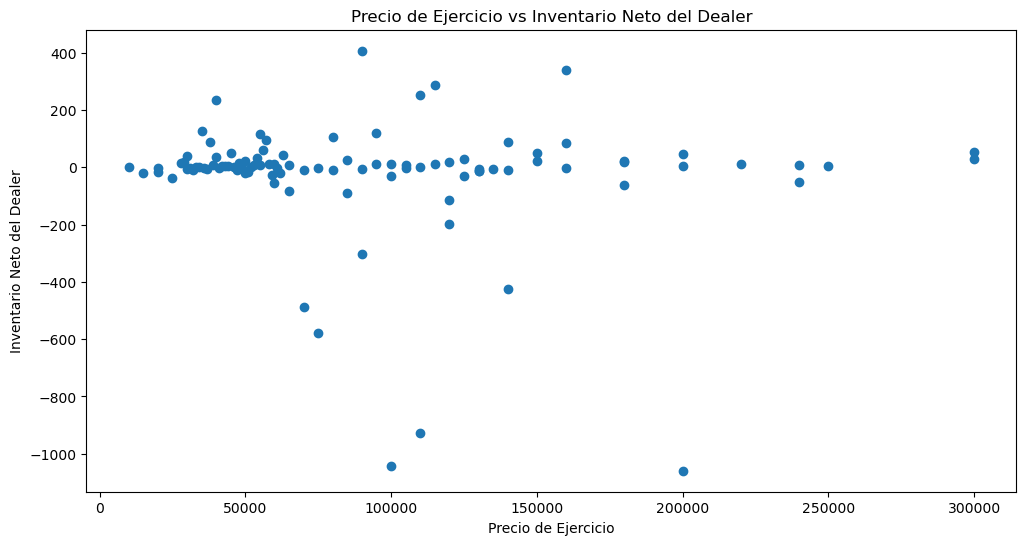

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df['strike'], df['dealer_net_inventory'])
plt.title('Precio de Ejercicio vs Inventario Neto del Dealer')
plt.xlabel('Precio de Ejercicio')
plt.ylabel('Inventario Neto del Dealer')
plt.show()

Distribución general: Los puntos están dispersos a lo largo de todo el rango de precios de ejercicio, desde cerca de 0 hasta 300,000.
Concentración: Hay una mayor concentración de puntos en la parte inferior del gráfico, cerca del inventario neto cero, especialmente para precios de ejercicio más bajos.
Valores extremos:

Hay algunos valores notablemente negativos de inventario neto, con el punto más bajo cerca de -1000.
También hay algunos valores positivos altos, con el punto más alto cerca de 400.


Patrón no lineal: No parece haber una relación lineal clara entre el precio de ejercicio y el inventario neto del dealer.
Asimetría: Hay más puntos con inventario neto positivo que negativo, pero los valores negativos tienden a ser más extremos.
Clusters: Se pueden observar algunos clusters o agrupaciones de puntos, especialmente en los precios de ejercicio más bajos.
Outliers: Hay varios puntos que se destacan como outliers, particularmente en el rango de inventario neto negativo.

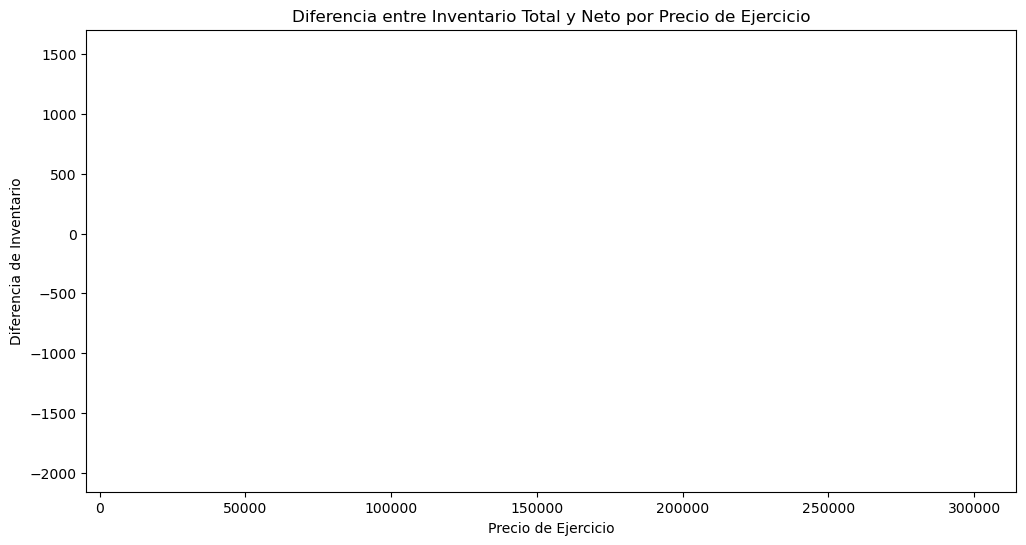

In [20]:
df['inventory_difference'] = df['dealer_tot_inventory'] - df['dealer_net_inventory']
plt.figure(figsize=(12, 6))
plt.bar(df['strike'], df['inventory_difference'])
plt.title('Diferencia entre Inventario Total y Neto por Precio de Ejercicio')
plt.xlabel('Precio de Ejercicio')
plt.ylabel('Diferencia de Inventario')
plt.show()

In [21]:
print("Valores únicos en gamma_level:", df['gamma_level'].unique())
print("Conteo de valores en gamma_level:")
print(df['gamma_level'].value_counts())

Valores únicos en gamma_level: [ 0.   -0.03 -0.01  0.01]
Conteo de valores en gamma_level:
gamma_level
 0.00    95
-0.01     3
-0.03     1
 0.01     1
Name: count, dtype: int64


Valores únicos de gamma_level:

0.00
-0.03
-0.01
0.01


Distribución de los valores:

0.00: 95 ocurrencias
-0.01: 3 ocurrencias
-0.03: 1 ocurrencia
0.01: 1 ocurrencia



Observaciones y análisis:

Predominancia de gamma cero:
La gran mayoría de los registros (95 de 100) tienen un gamma_level de 0. Esto es inusual y podría indicar:

Un error en la recopilación o procesamiento de datos.
Un período de baja volatilidad o actividad en el mercado.
Posibles problemas con la precisión o sensibilidad del cálculo de gamma.


Valores no nulos:
Solo 5 registros tienen valores de gamma no nulos, lo que sugiere que estos podrían ser casos especiales o puntos de interés particular.
Simetría:
Hay una ligera asimetría hacia los valores negativos (4 negativos vs 1 positivo), aunque la muestra es muy pequeña para sacar conclusiones firmes.
Magnitud:
Los valores no nulos son relativamente pequeños (-0.03, -0.01, 0.01), lo que podría indicar una sensibilidad limitada del gamma en este conjunto de datos.

In [23]:
non_zero_gamma = df[df['gamma_level'] != 0]
print(non_zero_gamma[['strike', 'expiration', 'gamma_level', 'dealer_net_inventory', 'dealer_tot_inventory']])

    strike           expiration  gamma_level  dealer_net_inventory  \
38  100000  2024-12-27 08:00:00        -0.03              -1043.10   
44   70000  2024-12-27 08:00:00        -0.01               -489.40   
95  110000  2024-09-27 08:00:00        -0.01               -928.40   
97  100000  2024-09-27 08:00:00        -0.01                -29.40   
99   90000  2024-09-27 08:00:00         0.01                407.39   

    dealer_tot_inventory  
38               -3024.9  
44               -1281.7  
95               -1134.1  
97               -1491.8  
99                1935.0  


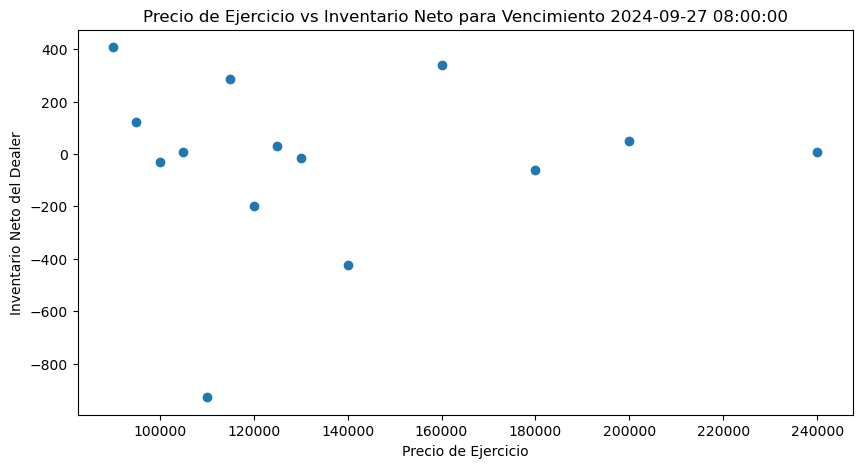

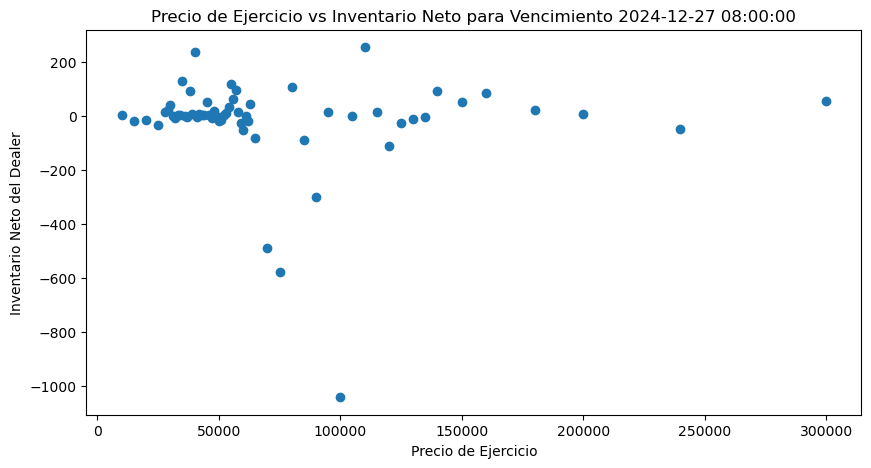

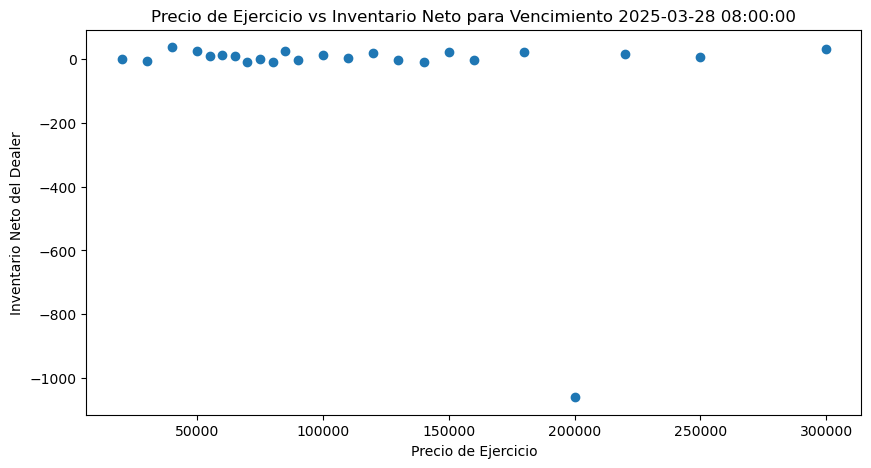

In [22]:
expiration_groups = df.groupby('expiration')
for name, group in expiration_groups:
    plt.figure(figsize=(10, 5))
    plt.scatter(group['strike'], group['dealer_net_inventory'])
    plt.title(f'Precio de Ejercicio vs Inventario Neto para Vencimiento {name}')
    plt.xlabel('Precio de Ejercicio')
    plt.ylabel('Inventario Neto del Dealer')
    plt.show()

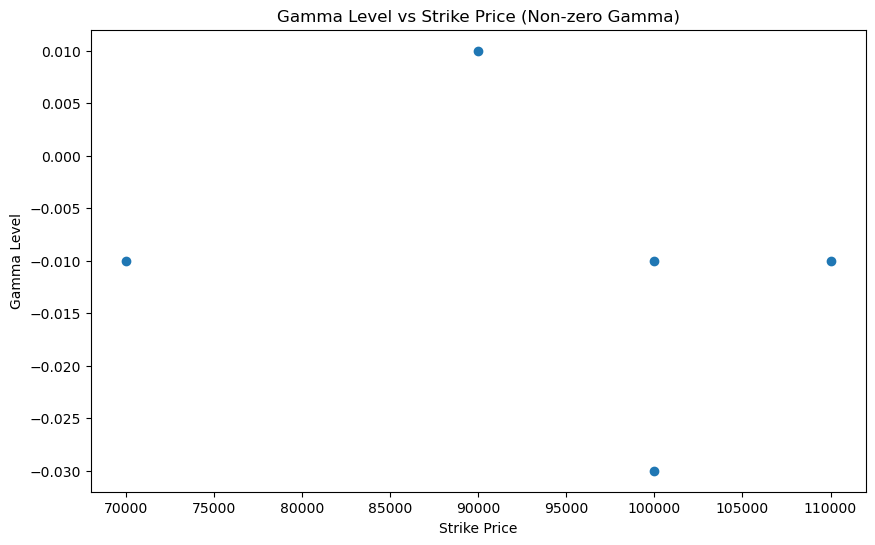

In [24]:
##Verificar si hay alguna relación entre los valores de gamma no nulos y otras variables

plt.figure(figsize=(10, 6))
plt.scatter(non_zero_gamma['strike'], non_zero_gamma['gamma_level'])
plt.title('Gamma Level vs Strike Price (Non-zero Gamma)')
plt.xlabel('Strike Price')
plt.ylabel('Gamma Level')
plt.show()

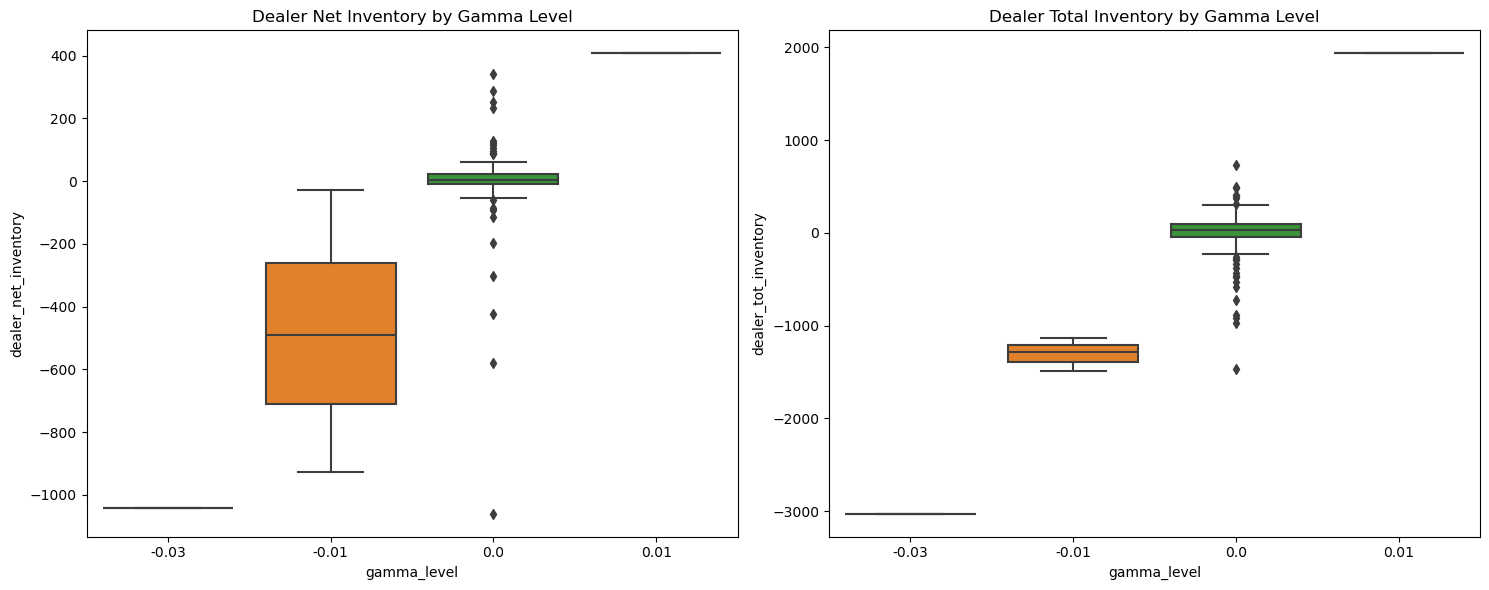

In [25]:
##Examinar la distribución de otras variables para los registros con gamma cero vs. no cero:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='gamma_level', y='dealer_net_inventory', data=df, ax=ax1)
ax1.set_title('Dealer Net Inventory by Gamma Level')

sns.boxplot(x='gamma_level', y='dealer_tot_inventory', data=df, ax=ax2)
ax2.set_title('Dealer Total Inventory by Gamma Level')

plt.tight_layout()
plt.show()

La mayoría de los casos (gamma 0.0) muestran una gran variabilidad en los inventarios, pero tienden a centrarse alrededor de 0.
Los casos con gamma no nulo (-0.01, -0.03) tienden a tener inventarios negativos más grandes, especialmente en el inventario total.
Hay una asimetría notable en los outliers para gamma 0.0, con algunos casos extremos tanto positivos como negativos.
El inventario total muestra una dispersión mayor que el inventario neto, lo que sugiere que hay más variabilidad en las posiciones totales que en las posiciones netas.
Los casos de gamma no nulo son pocos pero parecen estar asociados con posiciones de inventario más extremas.

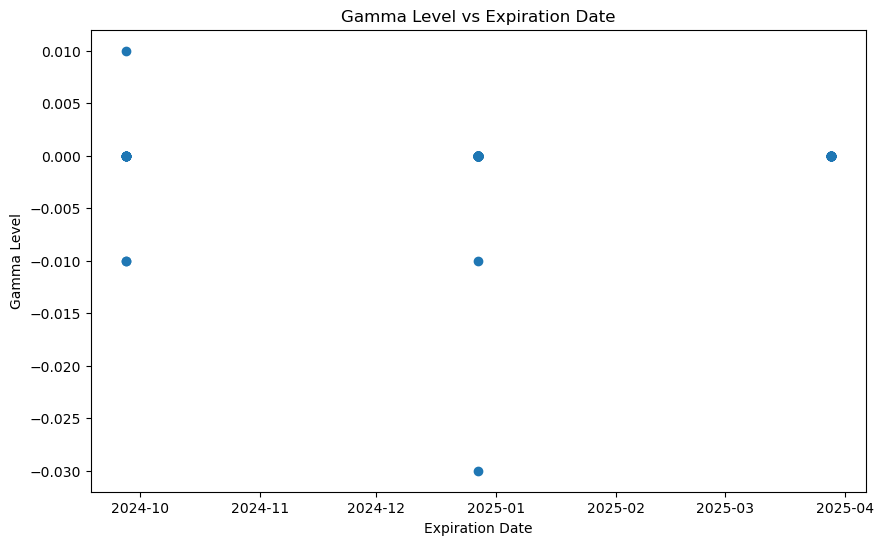

In [26]:
##Verificar si hay algún patrón temporal o relacionado con la fecha de vencimiento:


df['expiration'] = pd.to_datetime(df['expiration'])
plt.figure(figsize=(10, 6))
plt.scatter(df['expiration'], df['gamma_level'])
plt.title('Gamma Level vs Expiration Date')
plt.xlabel('Expiration Date')
plt.ylabel('Gamma Level')
plt.show()